# example of shifted variables for MFDCCA

In [41]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from typing import Any, List
import os
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
import pickle
import seaborn as sns
from collections import defaultdict

from concurrent.futures import ProcessPoolExecutor

In [2]:
import fathon
from fathon import fathonUtils as fu
from scipy.stats import norm


In [179]:
reconLOBs = '/media/ak/Data1/InterestRateFuturesData/ReconstructedLOB'
symbols = os.listdir(reconLOBs)
symbolIdx = 5
symbolFolder = os.path.join( reconLOBs, symbols[symbolIdx])
print(symbolFolder)
figuresLocation = '/home/ak/Documents/Research/Papers/StylisedFactsPaper/figures' # location to store the figures
print(os.path.isdir(figuresLocation))

/media/ak/Data1/InterestRateFuturesData/ReconstructedLOB/KE1
True


# Symbol

In [180]:
symbolFolders = [os.path.join(reconLOBs, symbol) for symbol in symbols]

In [181]:
# symbolFolders[3].split("/")[-1]

## take a subset of Data

In [182]:
# idx = 5
# all_dfs  = dict()
# dfCorrel= pd.DataFrame()
# filePath = os.path.join(symbolFolder, files[idx])
# dfLOB =pd.read_pickle(filePath)
#     # _=plt.hist(TradedVolume, bins =100)
# dfCorrel['microPriceReturns'] = dfLOB.copy().MicroPrice.pct_change().fillna(0)
# dfCorrel['averageVolumePerTrade'] = dfLOB.copy().AverageVolumePerTrade.fillna(0)
# dfCorrel['OrderBookImbalance'] = dfLOB.copy().OrderImbalance.fillna(0)
# dfCorrel['MeanRelativeTickVolume'] = dfLOB.copy().MeanRelativeTickVolume.fillna(0)
# dfCorrel['TradedVolume'] = dfLOB.copy().TradedVolume.fillna(0)

# all_dfs[idx] = dfCorrel

# # print(alldfs)
# print(filePath)

In [183]:



def process_file(idx, symbolFolder, files):
    """
    Processes a single file from a list of files, extracting and computing various financial metrics.

    Args:
        idx (int): The index of the file in the `files` list to be processed.
        symbolFolder (str): The directory path where the files are located.
        files (list): A list of filenames to be processed.

    Returns:
        dict: A dictionary containing computed financial metrics for the specified file. 
              The dictionary is structured with the file index as the key and its metrics as a nested dictionary.

    The function performs the following steps:
    1. Constructs the full file path by joining the `symbolFolder` path with the file name from `files` list at the given `idx`.
    2. Reads the pickled file into a pandas DataFrame (`dfLOB`).
    3. Computes the following metrics, handling missing values by filling them with zero:
       - 'microPriceReturns': The percentage change in 'MicroPrice'.
       - 'averageVolumePerTrade': The 'AverageVolumePerTrade'.
       - 'OrderBookImbalance': The 'OrderImbalance'.
       - 'TradedVolume': The 'TradedVolume'.
       - 'MeanRelativeTickVolume': The 'MeanRelativeTickVolume'.
    4. Returns these metrics in a dictionary keyed by the file index.
    
    Note: The function assumes that the DataFrame structure of the pickled files contains the 
    columns 'MicroPrice', 'AverageVolumePerTrade', 'OrderImbalance', 'TradedVolume', 
    and 'MeanRelativeTickVolume'.
    """
    # Function implementation...

    allvalues = defaultdict(dict)
    filePath = os.path.join(symbolFolder, files[idx])
    dfLOB = pd.read_pickle(filePath)
    allvalues[idx]['microPriceReturns'] = dfLOB.MicroPrice.pct_change().fillna(0)
    allvalues[idx]['averageVolumePerTrade'] = dfLOB.AverageVolumePerTrade.fillna(0)
    allvalues[idx]['OrderBookImbalance'] = dfLOB.OrderImbalance.fillna(0)
    allvalues[idx]['TradedVolume'] = dfLOB.TradedVolume.fillna(0)
    allvalues[idx]['RunningCumlNoOfTrades'] = dfLOB.RunningCumlNoOfTrades.fillna(0)
    allvalues[idx]['ArrivalRate'] = dfLOB.arrival_rate.fillna(0)
    allvalues[idx]['BASpread'] = dfLOB.BASpread.fillna(0)
    allvalues[idx]['MeanRelativeTickVolume'] = dfLOB['MeanRelativeTickVolume'].fillna(0)
    
    return allvalues


# 
This script performs parallel processing of a list of files using a specified function.

The process is outlined as follows:

1. Variable Definitions:
    - `symbolFolder`: Assumed to be pre-defined and contains a folder path or similar data. that is defined earlier with the symbolIdx as well
    - `files`: A list of files to be processed.

2. Parallel Processing:
    - Utilizes `ProcessPoolExecutor` for parallel execution, beneficial for CPU-bound tasks.

3. Function Mapping:
    - Maps the `process_file` function to each file.
    - The `process_file` function is applied in parallel to each file index, with each call receiving the same `symbolFolder` and the entire `files` list.

4. Result Collection:
    - Collects and combines results from the parallel processing into a `defaultdict` of dictionaries.

5. Output:
    - Outputs the combined results, providing a consolidated view of the processed data.

Note: The effectiveness of this script depends on the implementation of `process_file`, the contents of `symbolFolder` and `files`, and the specific data processing requirements.
"""


In [184]:

symbolFolder = symbolFolder
files = os.listdir(symbolFolder)

with ProcessPoolExecutor() as executor:
    results = list(executor.map(process_file, range(len(files)), [symbolFolder]*len(files), [files]*len(files)))

allvalues = defaultdict(dict)
for result in results:
    allvalues.update(result)

print(allvalues)


defaultdict(<class 'dict'>, {0: {'microPriceReturns': 506068    0.000000e+00
17483     0.000000e+00
508496    0.000000e+00
17482     0.000000e+00
506069   -1.261682e-05
              ...     
507022    2.220446e-16
101512    0.000000e+00
504928   -5.668391e-04
101513    0.000000e+00
507023    5.219728e-06
Name: MicroPrice, Length: 6445, dtype: float64, 'averageVolumePerTrade': 506068       0.0
17483        0.0
508496       0.0
17482        0.0
506069       0.0
           ...  
507022      10.0
101512     150.0
504928     150.0
101513    5315.0
507023    5315.0
Name: AverageVolumePerTrade, Length: 6445, dtype: float64, 'OrderBookImbalance': 506068   -0.616667
17483    -0.616667
508496   -0.616667
17482    -0.616667
506069   -0.888943
            ...   
507022   -1.000000
101512   -1.000000
504928   -0.117895
101513   -0.117895
507023   -0.061590
Name: OrderImbalance, Length: 6445, dtype: float64, 'TradedVolume': 506068       0.0
17483        0.0
508496       0.0
17482        0.0
506069 

In [185]:
symbolFolder

'/media/ak/Data1/InterestRateFuturesData/ReconstructedLOB/KE1'

In [186]:
allvalues[1].keys()

dict_keys(['microPriceReturns', 'averageVolumePerTrade', 'OrderBookImbalance', 'TradedVolume', 'RunningCumlNoOfTrades', 'ArrivalRate', 'BASpread', 'MeanRelativeTickVolume'])

In [187]:

#Computes a median DataFrame from a collection of dictionaries stored in a defaultdict. 
#Each dictionary within the defaultdict is first converted into a DataFrame. 
#These DataFrames might have different lengths. 
#To align them, NaN rows are appended to each DataFrame to match the maximum length among all the DataFrames. 
#After aligning the DataFrames in terms of their length, 
#the median for each column across all these DataFrames is computed. 
#The resulting DataFrame has the same columns as the original DataFrames and contains the median values 
#for each corresponding cell across all the original DataFrames.

# Args:
#     allvalues (defaultdict): A defaultdict where each value is a dictionary representing a DataFrame.

# Returns:
#     DataFrame: A DataFrame where each cell contains the median of the corresponding cells across 
# all the original DataFrames.


def compute_median_dataframe(allvalues):
    """
    Computes a median DataFrame from a collection of dictionaries stored in a defaultdict.
    Each dictionary is converted to a DataFrame, padded with NaNs to match the maximum 
    length, and the median is computed for each cell.

    Args:
        allvalues (defaultdict): A defaultdict where each value is a dictionary representing a DataFrame.

    Returns:
        DataFrame: A DataFrame where each cell is the median of the corresponding cells across all DataFrames.
    """
    # Convert each dictionary to a DataFrame
    dfs = [pd.DataFrame(v) for v in allvalues.values()]

    # Find the maximum length among the DataFrames
    max_length = max(df.shape[0] for df in dfs)

    # Append NaN rows to each DataFrame to match the maximum length
    padded_dfs = [df.append(pd.DataFrame(np.nan, index=range(df.shape[0], max_length), columns=df.columns)) for df in dfs]

    # Compute the median across these DataFrames for each column
    median_df = pd.concat(padded_dfs).groupby(level=0).median()

    return median_df

# Example usage
# 


In [188]:
median_df = compute_median_dataframe(allvalues)

In [189]:
name_mapping = {
    'microPriceReturns':'mPR', 
    'averageVolumePerTrade':'avgVpT', 
    'OrderBookImbalance':'OBI',
    'MeanRelativeTickVolume':'avgRTV', 
    'TradedVolume':'TrdVol',
    'OrderBookImbalance' : 'OBI', 
    'MeanRelativeTickVolume' : 'avgRTV',
    'BASpread': 'BidAsk'}


In [190]:
median_df =median_df.rename(columns=name_mapping)

In [191]:
corr = median_df.corr()

# #####

In [192]:
list(median_df.columns.values)

['mPR',
 'avgVpT',
 'OBI',
 'TrdVol',
 'RunningCumlNoOfTrades',
 'ArrivalRate',
 'BidAsk',
 'avgRTV']

In [193]:
def create_heatmap(df, tick_fontsize):
    """
    Takes a Pandas DataFrame as input and creates a heatmap using Seaborn.

    Args:
        df (pd.DataFrame): The input dataframe.
        tick_fontsize (int): The font size of the x and y tick labels.

    Returns:
        None.
    """
    # Set the font and color parameters
    plt.rcParams['font.sans-serif'] = 'Verdana'#'Helvetica'
    plt.rcParams['axes.edgecolor']='#333F4B'
    plt.rcParams['axes.linewidth']=0.8
    plt.rcParams['xtick.color']='#333F4B'
    plt.rcParams['ytick.color']='#333F4B'

    # Create the heatmap
    plt.figure(figsize=(10, 8), dpi=300) # Set the size of the figure
    ax = sns.heatmap(df.corr(), cmap='coolwarm', annot=True, annot_kws={"size": 18}, fmt='.2f', cbar=False)

    # Set the font size of the x and y tick labels
    ax.tick_params(axis='x', labelsize=tick_fontsize)
    ax.tick_params(axis='y', labelsize=tick_fontsize)
    title = str(symbols[symbolIdx])+'_base_correl_heatmap.png'
    fig_location = os.path.join(figuresLocation , title)
    plt.savefig(fig_location)
    
    

    # Show the plot
    plt.show()

In [194]:
symbols[symbolIdx]

'KE1'

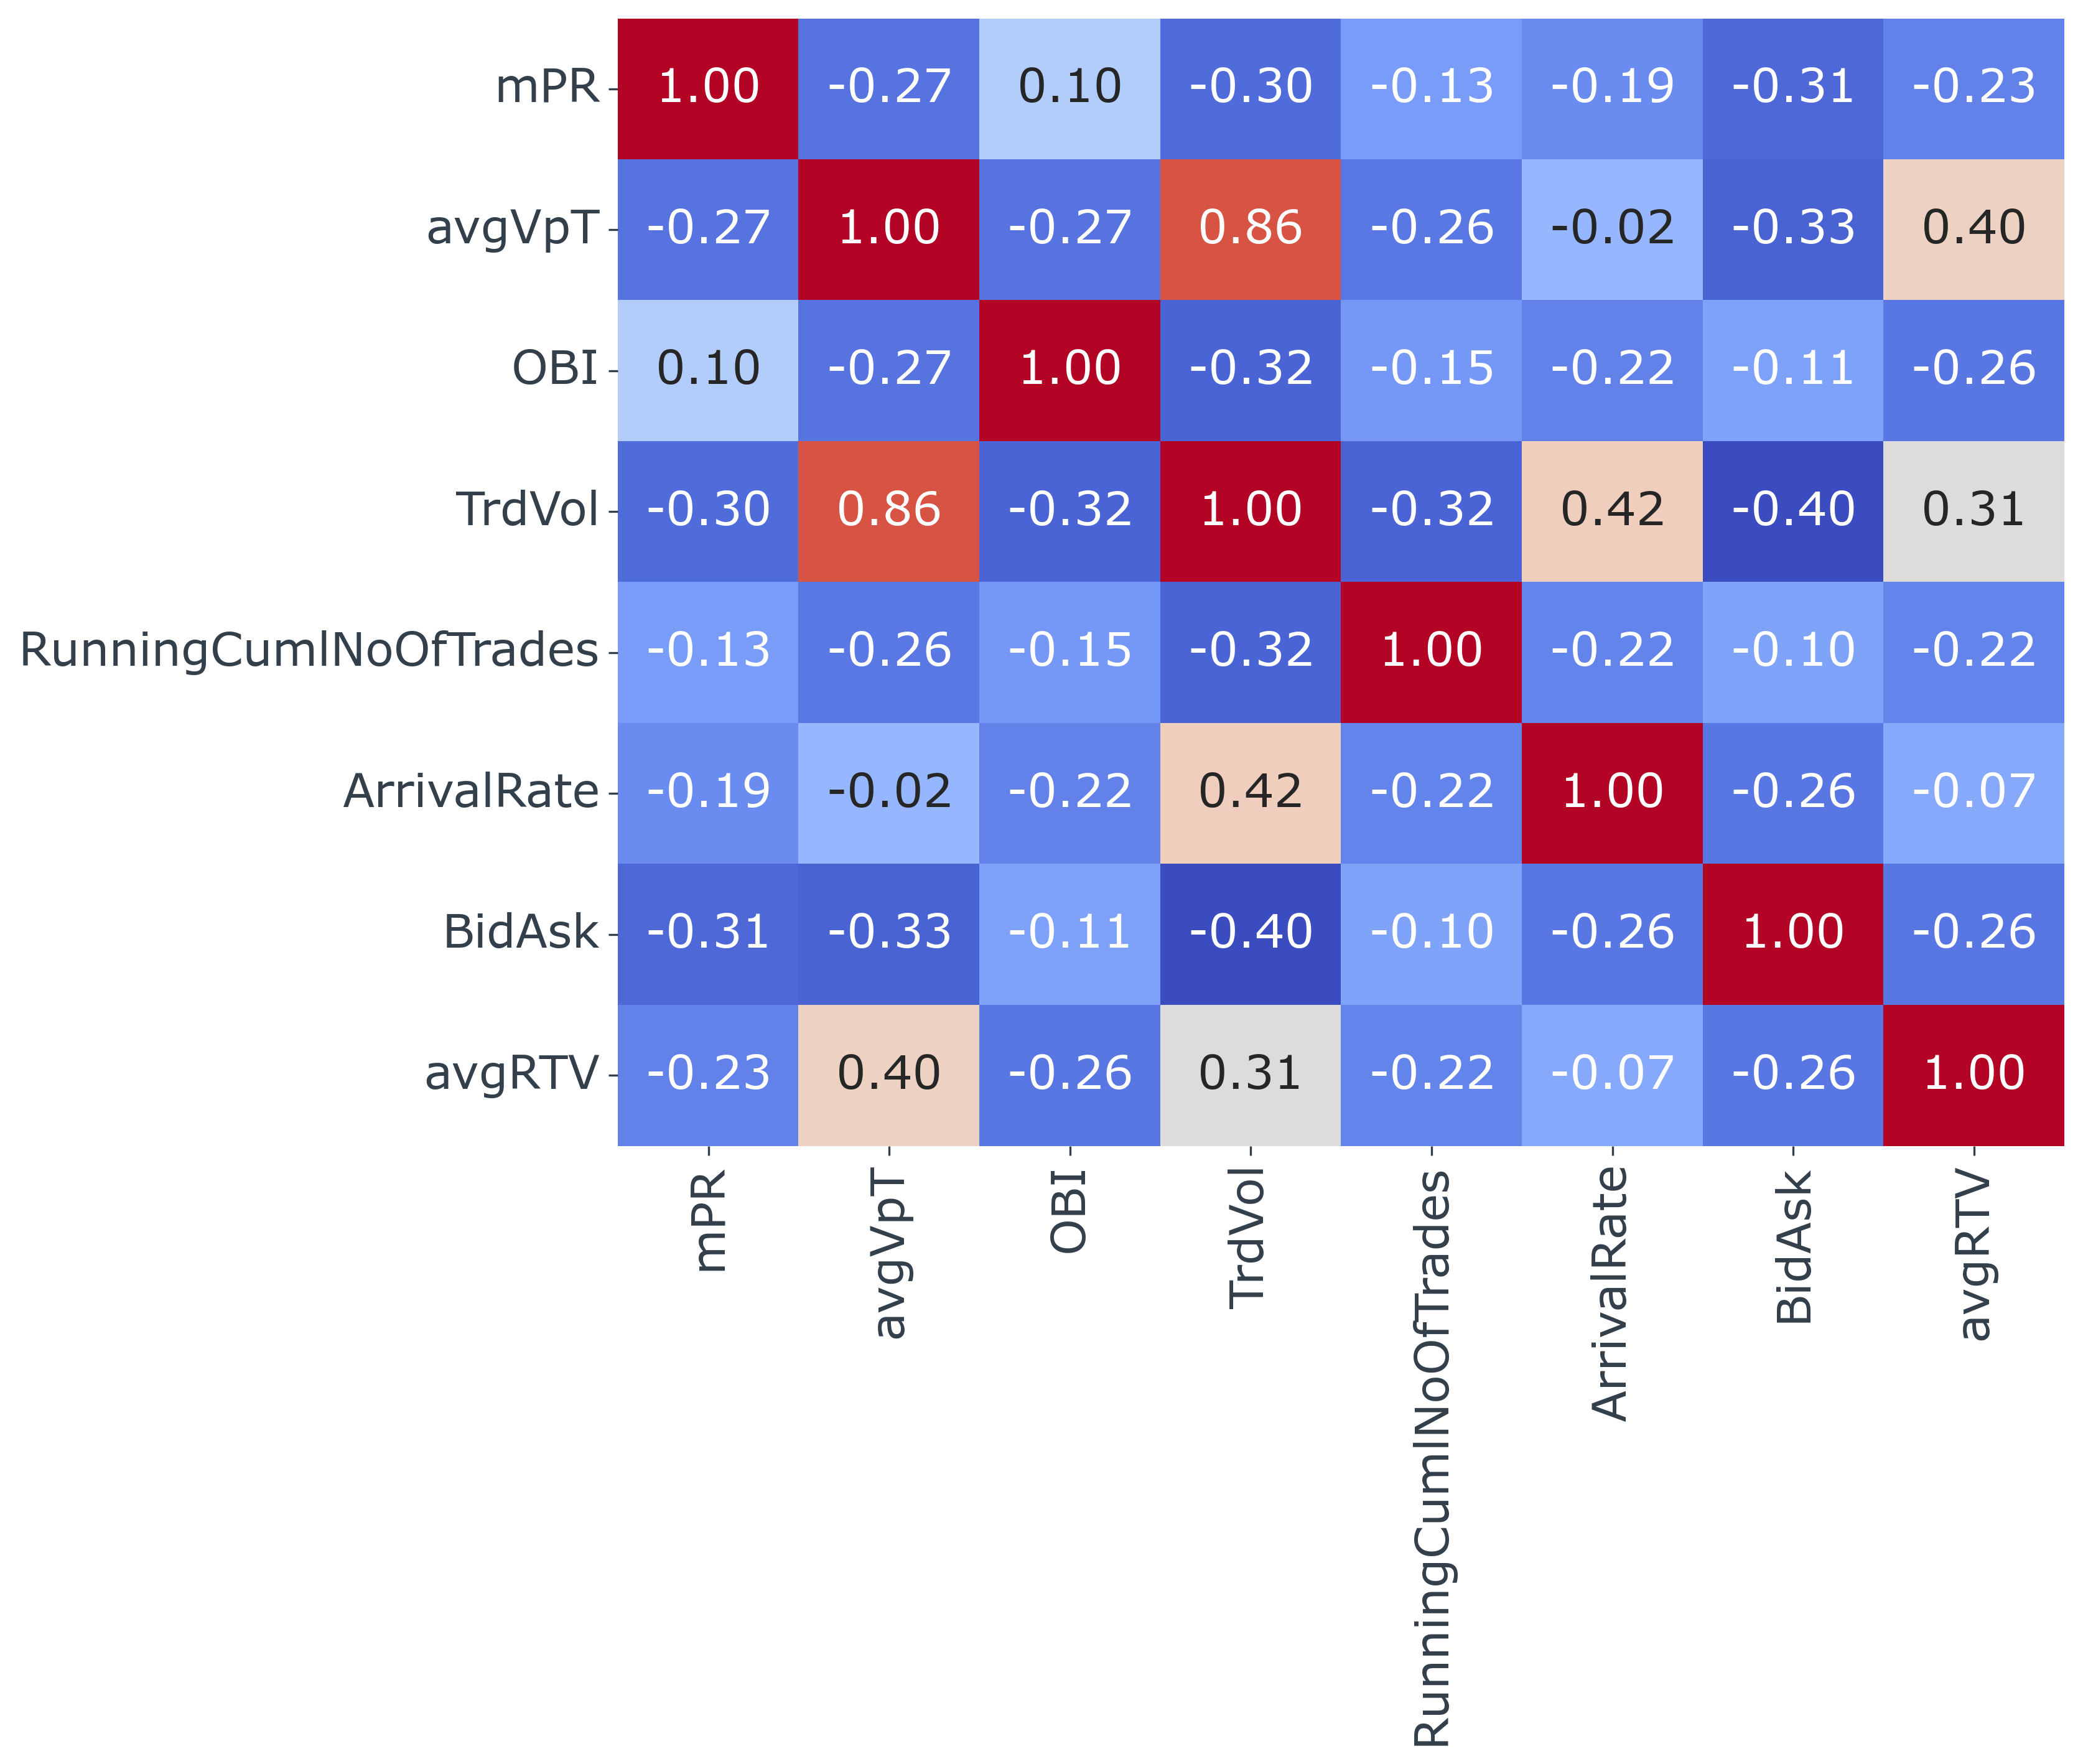

In [195]:
create_heatmap(corr, tick_fontsize=18)

#### next set of experiments ####

In [196]:
def create_heatmap_too(df, symbol, tick_fontsize=12):
    """
    Takes a Pandas DataFrame as input and creates a heatmap using Seaborn.

    Args:
        df (pd.DataFrame): The input dataframe.
        symbol (str): Symbol to be included in the title.
        tick_fontsize (int): The font size of the x and y tick labels.

    Returns:
        None.
    """
    # Set the font and color parameters
    plt.rcParams['font.sans-serif'] = 'Verdana'#'Helvetica'
    plt.rcParams['axes.edgecolor']='#333F4B'
    plt.rcParams['axes.linewidth']=0.8
    plt.rcParams['xtick.color']='#333F4B'
    plt.rcParams['ytick.color']='#333F4B'
    
    # Rename columns here
    # df = df.rename(columns={'old_name1': 'new_name1', 'old_name2': 'new_name2'})

    # Calculate correlations, round them and convert to percentage
    corr_df = df.corr().mul(100).applymap(lambda x: round(x, 1))

    # Create the heatmap
    plt.figure(figsize=(12, 10))  # Increase the size of the figure
    ax = sns.heatmap(corr_df, cmap='coolwarm', annot=False, fmt='.1f', cbar=True,  linewidth=.5, annot_kws={"size": 10})

    # Set the font size of the x and y tick labels
    ax.tick_params(axis='x', labelsize=tick_fontsize)
    ax.tick_params(axis='y', labelsize=tick_fontsize)
    ax.set_yticks([])

    # Add a title
    plt.title(str(symbol))
#     title = str(symbol)+'_lagged_correl_heatmap.png'
#     fig_location = os.path.join(figuresLocation , title)
#     plt.savefig(fig_location)

    # Show the plot
    plt.show()


In [197]:
medianDF.columns.values
df = medianDF.rename(columns={'OrderBookImbalance': 'OBI',
                              'OrderBookImbalance_lag_1_lag_2':'OBI-l3'})

NameError: name 'medianDF' is not defined

In [ ]:
medianDF.columns.values

In [ ]:
df = medianDF.rename(columns={
    'microPriceReturns':'mPR', 
    'averageVolumePerTrade':'avgVpT', 
    'OrderBookImbalance':'OBI',
    'MeanRelativeTickVolume':'avgRTV', 
    'TradedVolume':'TV',
    'microPriceReturns_lag_1':'mPR-lag1', 
    'averageVolumePerTrade_lag_1':'avgRTV-lag',
    'OrderBookImbalance_lag_1' : 'OBI-lag1', 
    'MeanRelativeTickVolume_lag_1' : 'avgRTV-lag1',
    'TradedVolume_lag_1':'TV-lag1', 
    'microPriceReturns_lag_2':'mPR-lag2',
    'averageVolumePerTrade_lag_2':'avgVpT-lag2', 
    'OrderBookImbalance_lag_2':'OBI-lag2',
    'MeanRelativeTickVolume_lag_2': 'avgRTV-lag2',
    'TradedVolume_lag_2':'TV-lag2',
    'microPriceReturns_lag_1_lag_2':'mPR-lag3',
    'averageVolumePerTrade_lag_1_lag_2':'avgVpT-lag3',
    'OrderBookImbalance_lag_1_lag_2':'OBI-lag3',
    'MeanRelativeTickVolume_lag_1_lag_2':'avgRTV-lag3', 
    'TradedVolume_lag_1_lag_2':'TV-lag3'})


In [ ]:
df

In [ ]:
create_heatmap_too(df, 'YM1', 16)

In [ ]:
from tabulate import tabulate

# Create a dictionary mapping old names to new ones
name_mapping = {
    'microPriceReturns':'mPR', 
    'averageVolumePerTrade':'avgVpT', 
    'OrderBookImbalance':'OBI',
    'MeanRelativeTickVolume':'avgRTV', 
    'TradedVolume':'TV',
    'microPriceReturns_lag_1':'mPR-lag1', 
    'averageVolumePerTrade_lag_1':'avgRTV-lag',
    'OrderBookImbalance_lag_1' : 'OBI-lag1', 
    'MeanRelativeTickVolume_lag_1' : 'avgRTV-lag1',
    'TradedVolume_lag_1':'TV-lag1', 
    'microPriceReturns_lag_2':'mPR-lag2',
    'averageVolumePerTrade_lag_2':'avgVpT-lag2', 
    'OrderBookImbalance_lag_2':'OBI-lag2',
    'MeanRelativeTickVolume_lag_2': 'avgRTV-lag2',
    'TradedVolume_lag_2':'TV-lag2',
    'microPriceReturns_lag_1_lag_2':'mPR-lag3',
    'averageVolumePerTrade_lag_1_lag_2':'avgVpT-lag3',
    'OrderBookImbalance_lag_1_lag_2':'OBI-lag3',
    'MeanRelativeTickVolume_lag_1_lag_2':'avgRTV-lag3', 
    'TradedVolume_lag_1_lag_2':'TV-lag3'}

# Prepare the data for the table
table_data = []
for old, new in name_mapping.items():
    # Split the old name into words and capitalize the first letter of each word
    old_formatted = ' '.join(word.capitalize() for word in old.split('_'))
    table_data.append([new, old, old_formatted])

# Create the table in LaTeX format
latex_table = tabulate(table_data, headers=['New Name', 'Old Name', 'Old Name Formatted'], tablefmt='latex')

# Print the LaTeX code
print(latex_table)


In [ ]:
# Rename the columns
column_name_mapping = {
    'mPR': 'microPriceReturns',
    'avgVpT': 'averageVolumePerTrade',
    'OBI': 'OrderBookImbalance',
    'avgRTV': 'MeanRelativeTickVolume',
    'TV': 'TradedVolume',
    'mPR-lag1': 'microPriceReturns_lag_1',
    'avgRTV-lag1': 'averageVolumePerTrade_lag_1',
    'OBI-lag1': 'OrderBookImbalance_lag_1',
    'avgRTV-lag1': 'MeanRelativeTickVolume_lag_1',
    'TV-lag1': 'TradedVolume_lag_1',
    'mPR-lag2': 'microPriceReturns_lag_2',
    'avgVpT-lag2': 'averageVolumePerTrade_lag_2',
    'OBI-lag2': 'OrderBookImbalance_lag_2',
    'avgRTV-lag2': 'MeanRelativeTickVolume_lag_2',
    'TV-lag2': 'TradedVolume_lag_2'
}

# Create a DataFrame for the LaTeX table
latex_df = pd.DataFrame(list(column_name_mapping.items()), columns=['New Name', 'Old Name'])

# Format the Old Name column
latex_df['Old Name'] = latex_df['Old Name'].str.replace('_', ' ').str.title()

# Generate the LaTeX table
latex_table = latex_df.to_latex(index=False)

# Print the LaTeX table
print(latex_table)


In [ ]:
# Rename the columns
column_name_mapping = {
    'mPR': 'microPriceReturns',
    'avgVpT': 'averageVolumePerTrade',
    'OBI': 'OrderBookImbalance',
    'avgRTV': 'MeanRelativeTickVolume',
    'TV': 'TradedVolume',
    'mPR-lag1': 'microPriceReturns_lag_1',
    'avgRTV-lag1': 'averageVolumePerTrade_lag_1',
    'OBI-lag1': 'OrderBookImbalance_lag_1',
    'avgRTV-lag1': 'MeanRelativeTickVolume_lag_1',
    'TV-lag1': 'TradedVolume_lag_1',
    'mPR-lag2': 'microPriceReturns_lag_2',
    'avgVpT-lag2': 'averageVolumePerTrade_lag_2',
    'OBI-lag2': 'OrderBookImbalance_lag_2',
    'avgRTV-lag2': 'MeanRelativeTickVolume_lag_2',
    'TV-lag2': 'TradedVolume_lag_2'
}

# Create a DataFrame for the LaTeX table
latex_df = pd.DataFrame(list(column_name_mapping.items()), columns=['New Name', 'Old Name'])

# Add a third column for definitions
latex_df['Definitions'] = ''

# Format the Old Name column
latex_df['Old Name'] = latex_df['Old Name'].str.replace('_', ' ').str.title()

# Generate the LaTeX table
latex_table = latex_df.to_latex(index=False)

# Print the LaTeX table
print(latex_table)


## doing all 3 dataframes together


In [ ]:
mfdcca = '/media/ak/Data/InterestRateFuturesData/MFDCCA/median_df_per_symbol'
os.listdir(mfdcca)

In [ ]:
rx1DF = pd.read_pickle(os.path.join(mfdcca,'RX1_median_lagged_correl.pkl' ))
jb1DF = pd.read_pickle(os.path.join(mfdcca,'JB1_median_lagged_correl.pkl' ))
us1DF = pd.read_pickle(os.path.join(mfdcca,'US1_median_lagged_correl.pkl' ))


In [ ]:
def rename_columns(dfs):
    column_name_mapping = {
        'microPriceReturns':'mPR', 
        'averageVolumePerTrade':'avgVpT', 
        'OrderBookImbalance':'OBI',
        'MeanRelativeTickVolume':'avgRTV', 
        'TradedVolume':'TV',
        'microPriceReturns_lag_1':'mPR-lag1', 
        'averageVolumePerTrade_lag_1':'avgRTV-lag',
        'OrderBookImbalance_lag_1' : 'OBI-lag1', 
        'MeanRelativeTickVolume_lag_1' : 'avgRTV-lag1',
        'TradedVolume_lag_1':'TV-lag1', 
        'microPriceReturns_lag_2':'mPR-lag2',
        'averageVolumePerTrade_lag_2':'avgVpT-lag2', 
        'OrderBookImbalance_lag_2':'OBI-lag2',
        'MeanRelativeTickVolume_lag_2': 'avgRTV-lag2',
        'TradedVolume_lag_2':'TV-lag2',
        'microPriceReturns_lag_1_lag_2':'mPR-lag3',
        'averageVolumePerTrade_lag_1_lag_2':'avgVpT-lag3',
        'OrderBookImbalance_lag_1_lag_2':'OBI-lag3',
        'MeanRelativeTickVolume_lag_1_lag_2':'avgRTV-lag3', 
        'TradedVolume_lag_1_lag_2':'TV-lag3'}

    return [df.rename(columns=column_name_mapping) for df in dfs]

In [ ]:
# Assuming rx1DF, jb1DF, and us1DF are your original DataFrames
dfs = [rx1DF, jb1DF, us1DF]

# Call the function
renamed_dfs = rename_columns(dfs)

# The function returns a list of DataFrames, so you can unpack them like this:
rx1df1new, jb1df2new, us1df3new = renamed_dfs

In [ ]:
rx1df1new

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# def plot_heatmaps(df1, df2, df3, title1, title2, title3):
#     fig, axes = plt.subplots(1, 3, figsize=(18, 6))

#     # Ensure all dataframes have the same columns
#     assert (df1.columns == df2.columns).all()
#     assert (df1.columns == df3.columns).all()
  
#     sns.heatmap(df1, ax=axes[0], cbar=False)
#     axes[0].set_title(title1)

#     sns.heatmap(df2, ax=axes[1], cbar=False)
#     axes[1].set_title(title2)
#     axes[1].set_yticks([])  # Hide y-ticks for the middle plot

#     sns.heatmap(df3, ax=axes[2])
#     axes[2].set_title(title3)
#     axes[2].set_yticks([])  # Hide y-ticks for the right-most plot

#     fig.tight_layout()
#     plt.show()

In [ ]:
# plot_heatmaps(rx1df1new, jb1df2new, us1df3new, 'RX1', 'JB1', 'US1')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
title1 ='RX1'
title2 = 'JB1'
title3 = 'US1'

sns.heatmap(rx1df1new,ax=axes[0], cbar=False)
axes[0].set_title(title1)

sns.heatmap(jb1df2new, ax=axes[1], cbar=False)
axes[1].set_title(title2)
axes[1].set_yticks([])  # Hide y-ticks for the middle plot


In [ ]:
rx1df1new

In [ ]:
create_heatmap_too(rx1df1new, 'RX1', 16)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# def create_heatmaps(df1, df2, df3, symbol1, symbol2, symbol3, figuresLocation, tick_fontsize=12):

#     plt.rcParams['font.sans-serif'] = 'Verdana'
#     plt.rcParams['axes.edgecolor']='#333F4B'
#     plt.rcParams['axes.linewidth']=0.8
#     plt.rcParams['xtick.color']='#333F4B'
#     plt.rcParams['ytick.color']='#333F4B'
    
#     # Calculate correlations, round them and convert to percentage for each dataframe
#     corr_df1 = df1.corr().mul(100).applymap(lambda x: round(x, 1))
#     corr_df2 = df2.corr().mul(100).applymap(lambda x: round(x, 1))
#     corr_df3 = df3.corr().mul(100).applymap(lambda x: round(x, 1))

#     fig, axes = plt.subplots(1, 3, figsize=(36, 12), sharey=True)
#     cbar_ax = fig.add_axes([.91, .3, .03, .4])

#     sns.heatmap(corr_df1, cmap='coolwarm', annot=False, fmt='.1f', cbar=False, ax=axes[0], linewidth=.5, annot_kws={"size": 10})
#     axes[0].set_title(symbol1)
#     axes[0].tick_params(axis='x', labelsize=tick_fontsize)
#     axes[0].tick_params(axis='y', labelsize=tick_fontsize)
    
#     sns.heatmap(corr_df2, cmap='coolwarm', annot=False, fmt='.1f', cbar=False, ax=axes[1], linewidth=.5, annot_kws={"size": 10})
#     axes[1].set_title(symbol2)
#     axes[1].tick_params(axis='x', labelsize=tick_fontsize)
#     axes[1].set_yticks([])

#     sns.heatmap(corr_df3, cmap='coolwarm', annot=False, fmt='.1f', cbar_ax=cbar_ax, ax=axes[2], linewidth=.5, annot_kws={"size": 10})
#     axes[2].set_title(symbol3)
#     axes[2].tick_params(axis='x', labelsize=tick_fontsize)
#     axes[2].set_yticks([])

#     fig.tight_layout(rect=[0, 0, .9, 1])
    
#     # Construct the file path and save the figure
#     title = '{}_{}_{}_correlation_heatmaps.png'.format(symbol1, symbol2, symbol3)
#     fig_location = os.path.join(figuresLocation, title)
#     plt.savefig(fig_location)

#     plt.show()

In [ ]:
create_heatmaps(rx1df1new, jb1df2new, us1df3new, 'RX1', 'JB1', 'US1', figuresLocation, tick_fontsize=16)

In [ ]:
def create_heatmaps_too(df1, df2, df3, symbol1, symbol2, symbol3, figuresLocation, tick_fontsize=20):
    # Set the font and color parameters
    plt.rcParams['font.sans-serif'] = 'Verdana'
    plt.rcParams['axes.edgecolor']='#333F4B'
    plt.rcParams['axes.linewidth']=0.8
    plt.rcParams['xtick.color']='#333F4B'
    plt.rcParams['ytick.color']='#333F4B'
    
    # Calculate correlations, round them and convert to percentage for each dataframe
    corr_df1 = df1.corr().mul(100).applymap(lambda x: round(x, 1))
    corr_df2 = df2.corr().mul(100).applymap(lambda x: round(x, 1))
    corr_df3 = df3.corr().mul(100).applymap(lambda x: round(x, 1))

    fig, axes = plt.subplots(1, 3, figsize=(40, 16), sharey=True)
    cbar_ax = fig.add_axes([.91, .20, .03, .76])  # Adjust colorbar to span the full length

    sns.heatmap(corr_df1, cmap='coolwarm', annot=False, fmt='.1f', cbar=False, ax=axes[0], linewidth=.5)
    axes[0].set_title(symbol1, fontsize=26)
    axes[0].tick_params(axis='x', labelsize=tick_fontsize)
    axes[0].tick_params(axis='y', labelsize=tick_fontsize)

    sns.heatmap(corr_df2, cmap='coolwarm', annot=False, fmt='.1f', cbar=False, ax=axes[1], linewidth=.5, annot_kws={"size": 14})
    axes[1].set_title(symbol2, fontsize=26)
    axes[1].tick_params(axis='x', labelsize=tick_fontsize)
    axes[1].set_yticks([])  # Hide y-ticks for the middle plot

    sns.heatmap(corr_df3, cmap='coolwarm', annot=False, fmt='.1f', cbar_ax=cbar_ax, ax=axes[2], linewidth=.5, annot_kws={"size": 28})
    axes[2].set_title(symbol3, fontsize=26)
    axes[2].tick_params(axis='x', labelsize=tick_fontsize)
    axes[2].set_yticks([])  # Hide y-ticks for the right-most plot

    fig.tight_layout(rect=[0, 0, .9, 1])

    # Construct the file path and save the figure
    title = '{}_{}_{}_correlation_heatmaps.png'.format(symbol1, symbol2, symbol3)
    fig_location = os.path.join(figuresLocation, title)
    plt.savefig(fig_location)

    plt.show()

In [ ]:
create_heatmaps_too(rx1df1new, jb1df2new, us1df3new, 'RX1', 'JB1', 'US1', figuresLocation, tick_fontsize=30)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

def create_heatmaps_three(df1, df2, df3, symbol1, symbol2, symbol3, figuresLocation, tick_fontsize=20):
    # Set the font and color parameters
    plt.rcParams['font.sans-serif'] = 'Verdana'
    plt.rcParams['axes.edgecolor']='#333F4B'
    plt.rcParams['axes.linewidth']=0.8
    plt.rcParams['xtick.color']='#333F4B'
    plt.rcParams['ytick.color']='#333F4B'
    
    # Calculate correlations, round them and convert to percentage for each dataframe
    corr_df1 = df1.corr().mul(100).applymap(lambda x: round(x, 1))
    corr_df2 = df2.corr().mul(100).applymap(lambda x: round(x, 1))
    corr_df3 = df3.corr().mul(100).applymap(lambda x: round(x, 1))

    fig, axes = plt.subplots(1, 3, figsize=(34, 12), sharey=True)
    cbar_ax = fig.add_axes([.91, .20, .03, .76])  # Adjust colorbar to span the full length

    sns.heatmap(corr_df1, cmap='coolwarm', annot=False, fmt='.1f', cbar=False, ax=axes[0], linewidth=.5)
    axes[0].set_title(symbol1, fontsize=30)
    axes[0].set_yticklabels(corr_df1.columns, size = tick_fontsize)  # Set y labels
    axes[0].tick_params(axis='x', labelsize=tick_fontsize)

    sns.heatmap(corr_df2, cmap='coolwarm', annot=False, fmt='.1f', cbar=False, ax=axes[1], linewidth=.5)
    axes[1].set_title(symbol2, fontsize=30)
    axes[1].tick_params(axis='x', labelsize=tick_fontsize)
    axes[1].set_yticks([])  # Hide y-ticks for the middle plot

    sns.heatmap(corr_df3, cmap='coolwarm', annot=False, fmt='.1f', cbar=True, cbar_ax=cbar_ax, ax=axes[2], linewidth=.5)
    cbar_ax.tick_params(labelsize=22)  # Set the colorbar tick size
    axes[2].set_title(symbol3, fontsize=30)
    axes[2].tick_params(axis='x', labelsize=tick_fontsize)
    axes[2].set_yticks([])  # Hide y-ticks for the right-most plot

    fig.tight_layout(rect=[0, 0, .9, 1])

    # Construct the file path and save the figure
    title = '{}_{}_{}_correlation_heatmaps.png'.format(symbol1, symbol2, symbol3)
    fig_location = os.path.join(figuresLocation, title)
    plt.savefig(fig_location)

    plt.show()

In [ ]:
create_heatmaps_three(rx1df1new, jb1df2new, us1df3new, 'RX1', 'JB1', 'US1', figuresLocation, tick_fontsize=30)

In [ ]:
def find_high_corr_latex(df1, df2, df3, df1_name, df2_name, df3_name, threshold):
    # Calculate correlation matrix for each dataframe
    corr_df1 = df1.corr()
    corr_df2 = df2.corr()
    corr_df3 = df3.corr()

    # List to store column pairs with high correlation
    high_corr_pairs = []

    # Iterate over upper triangle of correlation matrix
    cols = corr_df1.columns
    for i in range(0, len(cols)):
        for j in range(i + 1, len(cols)):
            # Check if correlation is above threshold in all dataframes
            if abs(corr_df1.iloc[i, j]) > threshold and abs(corr_df2.iloc[i, j]) > threshold and abs(corr_df3.iloc[i, j]) > threshold:
                high_corr_pairs.append((cols[i], cols[j]))

    # Generate LaTeX table
    latex_table = "\\begin{tabular}{|c|" + "|".join(["c"] * (len(cols) + 1)) + "|}\n"
    latex_table += "\\hline\n"
    latex_table += "Pairs & " + " & ".join([df1_name, df2_name, df3_name]) + " \\\\\n"
    latex_table += "\\hline\n"

    for pair in high_corr_pairs:
        row_values = [
            f"{corr_df1.loc[pair[0], pair[1]]:.2f}",
            f"{corr_df2.loc[pair[0], pair[1]]:.2f}",
            f"{corr_df3.loc[pair[0], pair[1]]:.2f}",
        ]
        latex_table += f"{pair[0]} - {pair[1]} & " + " & ".join(row_values) + " \\\\\n"

    latex_table += "\\hline\n"
    latex_table += "\\end{tabular}"

    return latex_table

In [ ]:
print(find_high_corr_latex(rx1df1new, jb1df2new, us1df3new, "RX1", "JB1", "US1",
                           0.5))
